# Intro to Pandas

## Learning Objectives

1. Learn about data frames and series in pandas.
2. Use the index concept in pandas to set and manipulate index values.
3. Select columns of a data frame.
4. Slice and filter specific rows of a data frame.
5. Perform calculations and operations with one or more columns of a data frame.
6. Compute grouped-level summary statistics across one or more columns in a data frame.

## Data Frames and Series

### Data Frames

A *data frame* is an abstraction over tabular data. Much like a matrix, data frames have columns and rows, where each column holds a specific data type and can be referred to by name. In the last section you saw some examples of data frames in the pandas library that we're using here; pandas is by far the most prevalent Python data frame implementation but is not the only one (other examples include PySpark, Dask, and Polars).

Data frames are displayed like this:

In [5]:
import pandas as pd

planes = pd.read_csv('../data/planes.csv')
planes.head(n=3)

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan


We've used the `head()` method to print out only the first three rows. As you can see, there are several columns that contain the data referred to by each name. The "tailnum" column contains an identifier for each row, the "year" column contains the year for each row, and so on.

Each column has a specific type. We can see these types by using the `dtypes` property:

In [6]:
planes.dtypes

tailnum          object
year            float64
type             object
manufacturer     object
model            object
engines           int64
seats             int64
speed           float64
engine           object
dtype: object

It's not important right now to understand what each of the types mean, though they're generally self explanatory. In this example, `int64` refers to 64 bit integers; `float64` refers to 64 bit floating point numbers; and `object` refers to columns that are not stored as a numeric type (often strings).

### Series

In fact, data frames are arguably not the fundamental data structure in pandas. Pandas has another concept called the *series*, which in essence refers to a single one-dimensional vector of data. Data frames are ordered collections of series, and we can recover a series from a data frame by referring to the column by name:

In [158]:
planes["engines"].head(n=3)

0    2
1    2
2    2
Name: engines, dtype: int64

**Note:** Equivalently, `planes.engines` will work, but that syntax is not preferred.

You're unlikely to use series objects very much for their own sake, but as we will see they are used in subsetting data frames.

### Indices

A concept used in pandas that is rare among data frame implementations is that of an *index*. Just as each column has a column name, each row can be referred to by its index. After reading a file from disk, there is usually a numeric index by default that orders rows from 1 to N:

In [14]:
planes.index

RangeIndex(start=0, stop=3322, step=1)

This can become more complex, however. For example, your index could be string labels or dates/times occurring at a specific frequency. For the latter, pandas even has built-in functions for creating and manipulating such indices:

In [147]:
pd.date_range(
    start="2022-01-01",
    end="2022-01-02",
    freq="h"  # for hour
)

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               '2022-01-01 10:00:00', '2022-01-01 11:00:00',
               '2022-01-01 12:00:00', '2022-01-01 13:00:00',
               '2022-01-01 14:00:00', '2022-01-01 15:00:00',
               '2022-01-01 16:00:00', '2022-01-01 17:00:00',
               '2022-01-01 18:00:00', '2022-01-01 19:00:00',
               '2022-01-01 20:00:00', '2022-01-01 21:00:00',
               '2022-01-01 22:00:00', '2022-01-01 23:00:00',
               '2022-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='H')

In general, I find indices to be a confusing corner of pandas; other data frame libraries have profitably left out the concept. For the most part I try to ignore the concept where I can, but you should be familiar with indices as they will come up at various points.

## Subsetting dimensions

We don't always want all of the data in a data frame, so we need to take subsets of the data frame. In general, **subsetting** is extracting a small portion of a DataFrame -- making the DataFrame smaller. Since the DataFrame is two-dimensional, there are two dimensions on which to subset.

**Dimension 1:** We may only want to consider certain *variables*. For example, we may only care about the `year` and `engines` variables:

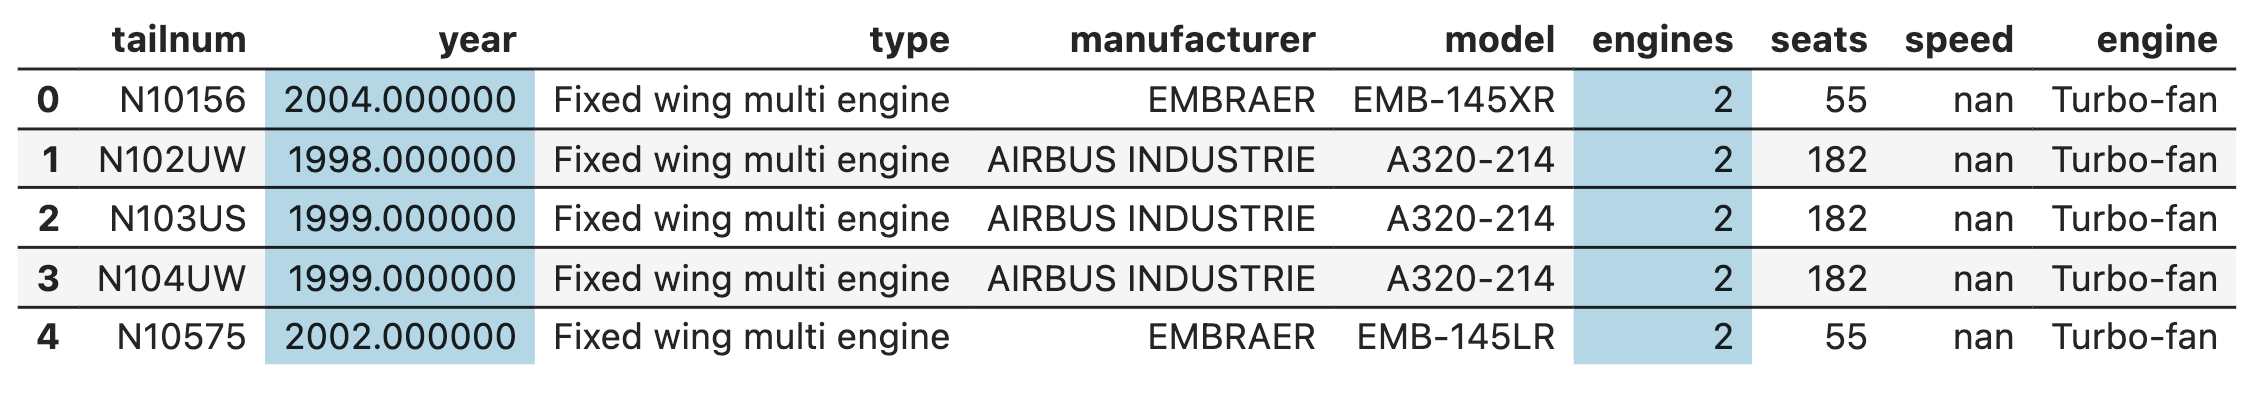

We call this **selecting** columns/variables -- this is similar to SQL's `SELECT` or R's dplyr package's `select()`.

**Dimension 2:** We may only want to consider certain *cases*. For example, we may only care about the cases where the manufacturer is Embraer.

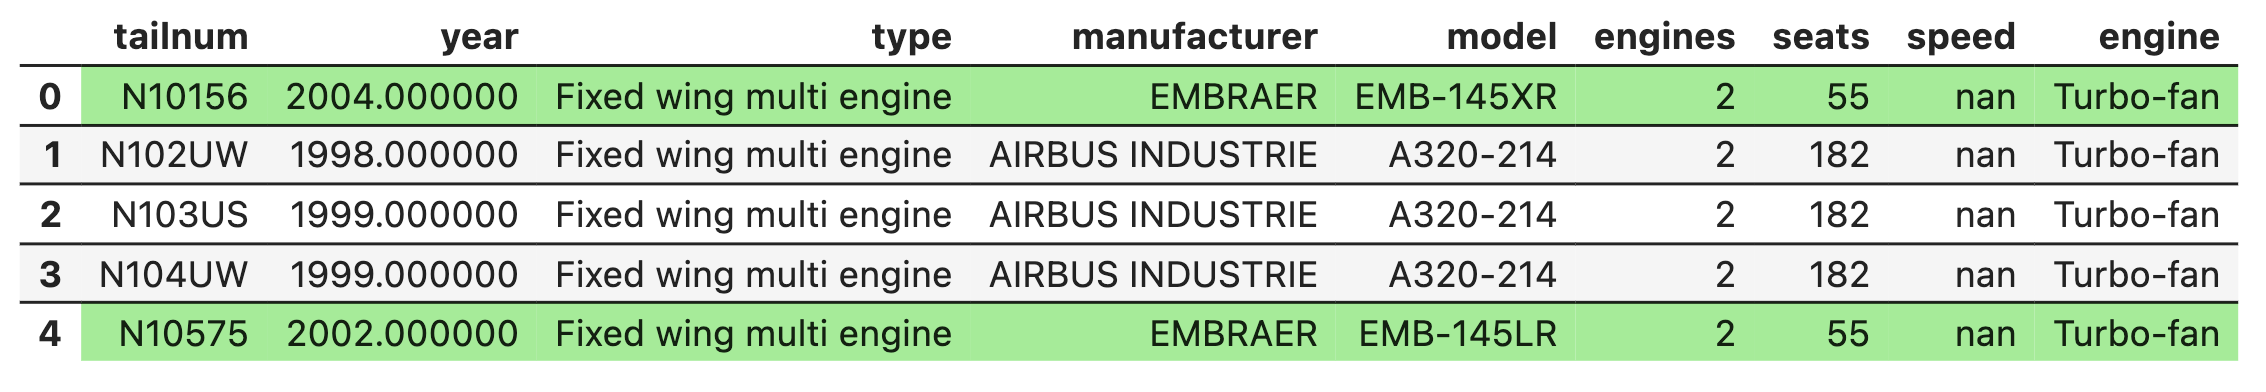

We call this **filtering** or **slicing** -- this is similar to SQL's `WHERE` or R's dplyr package's `filter()` or `slice()`. And we can combine these two options to subset in both dimensions -- the `year` and `engines` variables where the manufacturer is Embraer:

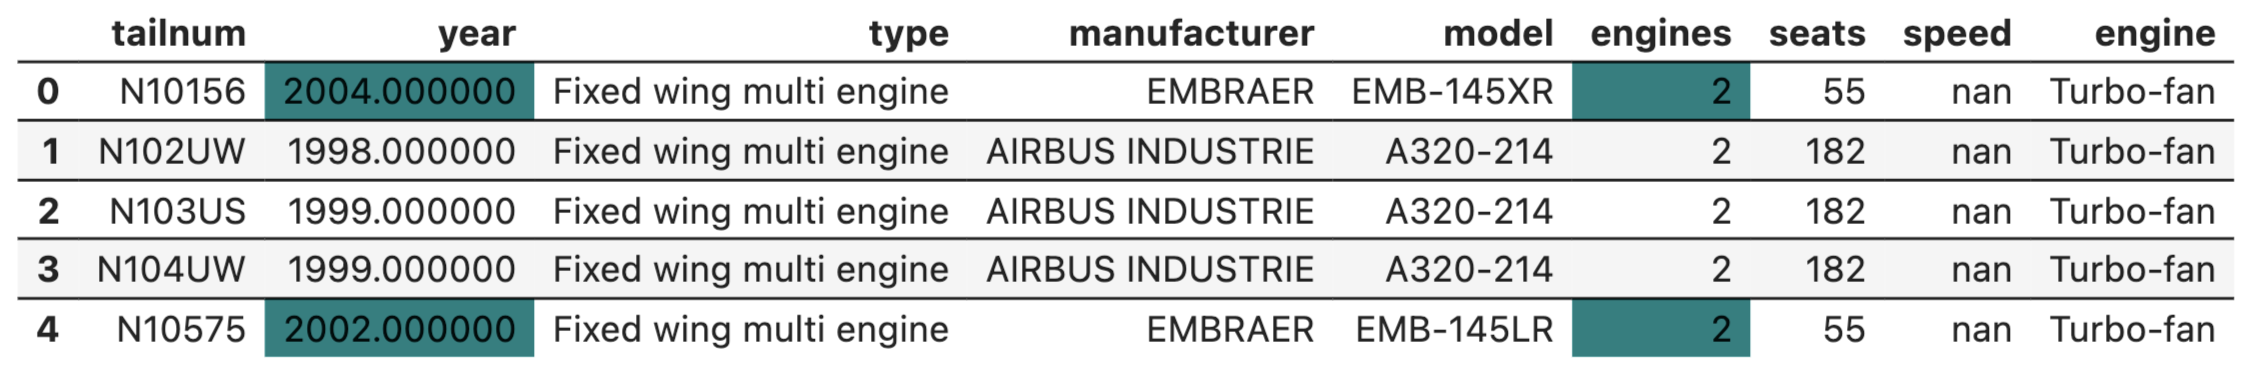

In the previous example, we want to do two things using `planes`:

  1. **select** the `year` and `engines` variables
  2. **filter** to cases where the manufacturer is Embraer

But we also want to return a new DataFrame -- not just highlight certain cells. In other words, we want to turn this:

In [57]:
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,60,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


Into this:

In [159]:
planes.head().loc[
    planes['manufacturer'] == 'EMBRAER',
    ['year', 'engines']
]

,year,engines
0,2004.0,2
4,2002.0,2


Luckily, this is largely the case with the methods we detail below.

## Subsetting variables

Recall that the subsetting of variables/columns is called **selecting** variables/columns. In a simple example, we can select a single variable as a `Series` object using bracket subsetting notation:

In [61]:
planes['year'].head()

0    2004.0
1    1998.0
2    1999.0
3    1999.0
4    2002.0
Name: year, dtype: float64

To get a data frame back instead of a series, we can pass a list instead of a single string column name:

In [62]:
planes[['year']].head()

,year
0,2004.0
1,1998.0
2,1999.0
3,1999.0
4,2002.0


Passing a list into the bracket subsetting notation allows us to select multiple variables at once:

In [64]:
planes[['year', 'engines']].head()

,year,engines
0,2004.0,2
1,1998.0,2
2,1999.0,2
3,1999.0,2
4,2002.0,2


## Subsetting rows

When we subset rows (aka cases, records, observations) we primarily use two names: **slicing** and **filtering**, but *these are not the same*:

  * **slicing**, similar to row **indexing**, subsets observations by the value of the Index
  * **filtering** subsets observations using a conditional test

### Slicing rows

We can **slice** cases/rows using the values in the `Index` and bracket subsetting notation. It's common practice to use `.loc` to slice cases/rows:

In [66]:
planes.loc[0:5]

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,60,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
5,N105UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan


We can also pass a `list` of `Index` values:

In [67]:
planes.loc[[0, 2, 4, 6, 8]]

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,60,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
6,N107US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
8,N109UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan


### Filtering rows

We can **filter** rows using a logical `Series` equal in length to the number of rows in the DataFrame.

Continuing our example, assume we want to determine whether each case's `manufacturer` is Embraer. We can use the `manufacturer` Series and a logical equivalency test to find the result for each row:

In [68]:
planes['manufacturer'] == 'EMBRAER'

0        True
1       False
2       False
3       False
4        True
        ...  
3317    False
3318    False
3319    False
3320    False
3321    False
Name: manufacturer, Length: 3322, dtype: bool

We can use this resulting logical sequence to test **filter** cases -- rows that are `True` will be returned while those that are `False` will be removed:

In [69]:
planes[planes['manufacturer'] == 'EMBRAER'].head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,60,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
10,N11106,2002.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
11,N11107,2002.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
12,N11109,2002.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan


This also works with `.loc`, the benefit being that with `.loc` you can specify certain columns as well:

In [160]:
planes.loc[
    planes['manufacturer'] == 'EMBRAER',
    ["tailnum", "year"]
].head()

,tailnum,year
0,N10156,2004.0
4,N10575,2002.0
10,N11106,2002.0
11,N11107,2002.0
12,N11109,2002.0


Multiple conditional tests can be combined using logical operators (a single | or &):

In [72]:
planes.loc[(planes['year'] > 2002) & (planes['year'] < 2004)].head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
15,N11121,2003.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
16,N11127,2003.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
17,N11137,2003.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
18,N11140,2003.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
19,N11150,2003.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan


## Renaming columns

Often, one of the first things we want to do with a new data set is clean up the column names. We can do this a few different ways and to illustrate, let's look at the Ames housing data:

In [73]:
ames = pd.read_csv('../data/ames_raw.csv')
ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Say we want to rename the "MS SubClass" and "MS Zoning" columns. We can do so with the `rename` method and passing a dictionary that maps old names to new names: `df.rename(columns={'old_name1': 'new_name1', 'old_name2': 'new_name2'})`.

In [161]:
ames.rename(
    columns={
        'MS SubClass': 'ms_subclass',
        'MS Zoning': 'ms_zoning'
    }
).head()

,order,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,...,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,sale condition,saleprice,price_per_sqft
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,129.830918
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,117.187500
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,129.420617
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,115.639810
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,116.574586


Note that the `.rename()` method returns a new data frame and does not modify the original data frame in place.

You can also rename columns by modifying the `.columns` property in place:

In [78]:
ames.columns = [c.lower() for c in ames.columns]
ames.head()

,order,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,...,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,sale condition,saleprice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Calculations using columns

It's common to want to modify a column of a DataFrame, or sometimes even to create a new column. For example, let's look at the saleprice column in our data.

In [79]:
sale_price = ames['saleprice']
sale_price

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: saleprice, Length: 2930, dtype: int64

Say we wanted to represent sale price in the thousands of dollars. We can do this by dividing by 1,000.

In [81]:
sale_price_k = sale_price / 1000
sale_price_k

0       215.0
1       105.0
2       172.0
3       244.0
4       189.9
        ...  
2925    142.5
2926    131.0
2927    132.0
2928    170.0
2929    188.0
Name: saleprice, Length: 2930, dtype: float64

From a mathematical perspective, what we're doing here is adding a *scalar* -- a single value -- to a *vector* -- a series of values (aka a `Series`).
Other vector-scalar math is supported as well.

In [148]:
(ames['saleprice'] - 12).head(n=2)

0    214988
1    104988
Name: saleprice, dtype: int64

In [149]:
(ames['saleprice'] * 10).head(n=2)

0    2150000
1    1050000
Name: saleprice, dtype: int64

In [150]:
(ames['saleprice'] ** 2).head(n=2)

0    46225000000
1    11025000000
Name: saleprice, dtype: int64

## Adding & removing columns

So we've create a new series, `sale_price_k`. Right now it's totally separate from our original `ames` data frame, but we can make it a column of `ames` using the assignment syntax with the column reference syntax.
```python
df['new_column_name'] = new_column_series
```

In [87]:
ames['sale_price_k'] = sale_price_k
ames.head()

,order,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,...,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,sale condition,saleprice,sale_price_k
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,215.0
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,105.0
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,172.0
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,244.0
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,189.9


You can even overwrite existing columns this way:

In [88]:
ames['sale_price_k'] = sale_price_k / 10

We may want to drop columns as well. For this we can use the `.drop()` method:

In [89]:
ames = ames.drop(columns=['sale_price_k'])
ames.head()

,order,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,...,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,sale condition,saleprice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Calculating based on multiple columns

So far we've only seen vector-scalar math. But vector-vector math is supported as well, where arithmetic operations are done element-by-element along each array. Let's look at a toy example of creating a column that contains the price per square foot.

In [94]:
price_per_sqft = ames['saleprice'] / ames['gr liv area']
price_per_sqft.head()

0    129.830918
1    117.187500
2    129.420617
3    115.639810
4    116.574586
dtype: float64

Creating a new column is as simple as accessing that column in the normal way and assigning new values to it:

In [151]:
ames['price_per_sqft'] = price_per_sqft
ames.head()

,order,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,...,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,sale condition,saleprice,price_per_sqft
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,129.830918
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,117.187500
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,129.420617
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,115.639810
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,116.574586


## Non-numeric column operations

For simplicity, we started with mathematical operations. However, pandas supports string operations as well. We can use `+` to concatenate strings, with both vectors and scalars.

In [162]:
('Home in ' + 
 ames['neighborhood'] + 
 ' neighborhood sold under ' + 
 ames['sale condition'] + 
 ' condition'
).head(n=5)

0    Home in NAmes neighborhood sold under Normal c...
1    Home in NAmes neighborhood sold under Normal c...
2    Home in NAmes neighborhood sold under Normal c...
3    Home in NAmes neighborhood sold under Normal c...
4    Home in Gilbert neighborhood sold under Normal...
dtype: object

More complex string operations are possible using methods available through the `.str` *accessor*. See the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) for more details on this.

In [153]:
# number of characters in string
ames['neighborhood'].str.len().head(n=5)

0    5
1    5
2    5
3    5
4    7
Name: neighborhood, dtype: int64

In [154]:
ames['garage type'].str.lower().str.replace('tchd', 'tached').head(n=5)

0    attached
1    attached
2    attached
3    attached
4    attached
Name: garage type, dtype: object

## Missing values

Missing values are typically denoted with NaN. We can use `df.isnull()` to find missing values in a dataframe. It returns a boolean for each element in the dataframe:

In [155]:
ames.isnull().head(n=5)

,order,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,...,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,sale condition,saleprice,price_per_sqft
0,False,False,False,False,False,False,False,True,False,False,...,True,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,True,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,True,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,True,False,True,False,False,False,False,False,False,False


We can use this to easily compute the total number of missing values in each column:

In [100]:
ames.isnull().sum()

order               0
pid                 0
ms subclass         0
ms zoning           0
lot frontage      490
                 ... 
yr sold             0
sale type           0
sale condition      0
saleprice           0
price_per_sqft      0
Length: 83, dtype: int64

We can use `any()` to identify which columns have missing values. We can use this information for various reasons such as subsetting for just those columns that have missing values.

In [163]:
# identify if missing values exist in each column:
missing = ames.isnull().any()

# subset for just those columns that have missing values:
ames[missing[missing].index].head(n=5)

,lot frontage,alley,mas vnr type,mas vnr area,bsmt qual,bsmt cond,bsmt exposure,bsmtfin type 1,bsmtfin sf 1,bsmtfin type 2,...,garage type,garage yr blt,garage finish,garage cars,garage area,garage qual,garage cond,pool qc,fence,misc feature
0,141.0,NaN,Stone,112.0,TA,Gd,Gd,BLQ,639.0,Unf,...,Attchd,1960.0,Fin,2.0,528.0,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,TA,TA,No,Rec,468.0,LwQ,...,Attchd,1961.0,Unf,1.0,730.0,TA,TA,NaN,MnPrv,NaN
2,81.0,NaN,BrkFace,108.0,TA,TA,No,ALQ,923.0,Unf,...,Attchd,1958.0,Unf,1.0,312.0,TA,TA,NaN,NaN,Gar2
3,93.0,NaN,None,0.0,TA,TA,No,ALQ,1065.0,Unf,...,Attchd,1968.0,Fin,2.0,522.0,TA,TA,NaN,NaN,NaN
4,74.0,NaN,None,0.0,Gd,TA,No,GLQ,791.0,Unf,...,Attchd,1997.0,Fin,2.0,482.0,TA,TA,NaN,MnPrv,NaN


When you have missing values, we usually either drop them or impute them. You can drop missing values with `.dropna()`:

In [105]:
ames.dropna()

,order,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,...,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,sale condition,saleprice,price_per_sqft


Unfortunately, in this case every row has an NA value. Another option would be to impute:

In [106]:
import numpy as np

# example DataFrame with missing values
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [107]:
df.fillna(0)  # fill with 0

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [108]:
df.fillna(df.mean())  # fill with the mean

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,3.0,NaN,5
3,3.0,3.0,NaN,4


In [109]:
df.fillna(method='bfill')  # backward (upwards) fill from non-nan values

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,3.0,NaN,5
3,NaN,3.0,NaN,4


In [110]:
df.fillna(method='ffill')  # forward (downward) fill from non-nan values

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,NaN,5
3,3.0,3.0,NaN,4


## Applying custom functions

There will be times when you want to apply a function that is not built-in to Pandas. For this, we have methods:

* `df.apply()`, applies a function column-wise or row-wise across a dataframe (the function must be able to accept/return an array)
* `df.applymap()`, applies a function element-wise (for functions that accept/return single values at a time)
* `series.apply()`/`series.map()`, same as above but for Pandas series

For example, say you had the following custom function that defines if a home is considered a luxery home simply based on the price sold.

In [112]:
def is_luxury_home(x):
    if x > 500000:
        return 'Luxury'
    else:
        return 'Non-luxury'

ames['saleprice'].apply(is_luxury_home)

0       Non-luxury
1       Non-luxury
2       Non-luxury
3       Non-luxury
4       Non-luxury
           ...    
2925    Non-luxury
2926    Non-luxury
2927    Non-luxury
2928    Non-luxury
2929    Non-luxury
Name: saleprice, Length: 2930, dtype: object

You can even use functions that require additional arguments. Just specify the arguments in `.apply()`:

In [113]:
def is_luxury_home(x, price):
    if x > price:
        return 'Luxury'
    else:
        return 'Non-luxury'

ames['saleprice'].apply(is_luxury_home, price=200000)

0           Luxury
1       Non-luxury
2       Non-luxury
3           Luxury
4       Non-luxury
           ...    
2925    Non-luxury
2926    Non-luxury
2927    Non-luxury
2928    Non-luxury
2929    Non-luxury
Name: saleprice, Length: 2930, dtype: object

Sometimes we may have a function that we want to apply to every element across multiple columns. For example, say we wanted to convert several of the square footage variables to be represented as square meters. For this we can use the [`.applymap()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.applymap.html) method.

In [164]:
def convert_to_sq_meters(x):
    return x*0.092903

ames[
    ['gr liv area', 'garage area', 'lot area']
].applymap(convert_to_sq_meters).head(n=5)

,gr liv area,garage area,lot area
0,153.847368,49.052784,2951.528310
1,83.241088,67.819190,1079.718666
2,123.468087,28.985736,1325.447101
3,196.025330,48.495366,1036.797480
4,151.338987,44.779246,1284.848490


## Summarizing a Data Frame

There are various aggregation functions that largely do what you'd expect:

In [117]:
ames[['saleprice', 'gr liv area']].mean()

saleprice      180796.060068
gr liv area      1499.690444
dtype: float64

In [118]:
ames[['saleprice', 'gr liv area']].median()

saleprice      160000.0
gr liv area      1442.0
dtype: float64

To easily get a description of various useful summary statistics for each column, you can use the `.describe()` method:

In [122]:
ames.describe()

,order,pid,ms subclass,lot frontage,lot area,overall qual,overall cond,year built,year remod/add,mas vnr area,...,open porch sf,enclosed porch,3ssn porch,screen porch,pool area,misc val,mo sold,yr sold,saleprice,price_per_sqft
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068,121.303619
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357,32.090488
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,15.371394
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000,99.871575
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000,120.230070
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000,139.885283
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000,276.250881


### The Aggregation method

While summary methods can be convenient, there are a few drawbacks to using them on DataFrames:

1. You can only apply one summary method at a time
2. You have to apply the same summary method to all variables
3. A Series is returned rather than a DataFrame -- this makes it difficult to use the values in our analysis later

In order to get around these problems, the DataFrame has a powerful method `.agg()`:

In [119]:
ames.agg({
    'saleprice': ['mean']
})

,saleprice
mean,180796.060068


We can extend this to multiple variables by adding elements to the `dict`:

In [120]:
ames.agg({
    'saleprice': ['mean'],
    'gr liv area': ['mean']
})

,saleprice,gr liv area
mean,180796.060068,1499.690444


And because the values of the `dict` are lists, we can do additional aggregations at the same time:

In [121]:
ames.agg({
    'saleprice': ['mean', 'median'],
    'gr liv area': ['mean', 'min']
})

,saleprice,gr liv area
mean,180796.060068,1499.690444
median,160000.000000,NaN
min,NaN,334.000000


## Grouped aggregation

In the section above, we talked about **summary** operations in the context of collapsing a DataFrame to a single row. This is not always the case -- often we are interested in examining specific groups in our data and we want to perform summary operations for these groups. Thus, we are interested in collapsing to a *single row per group*. This is known as a **grouped aggregation**.

For example, in the following illustration we are interested in finding the sum of variable `B` for each category/value in variable `A`.

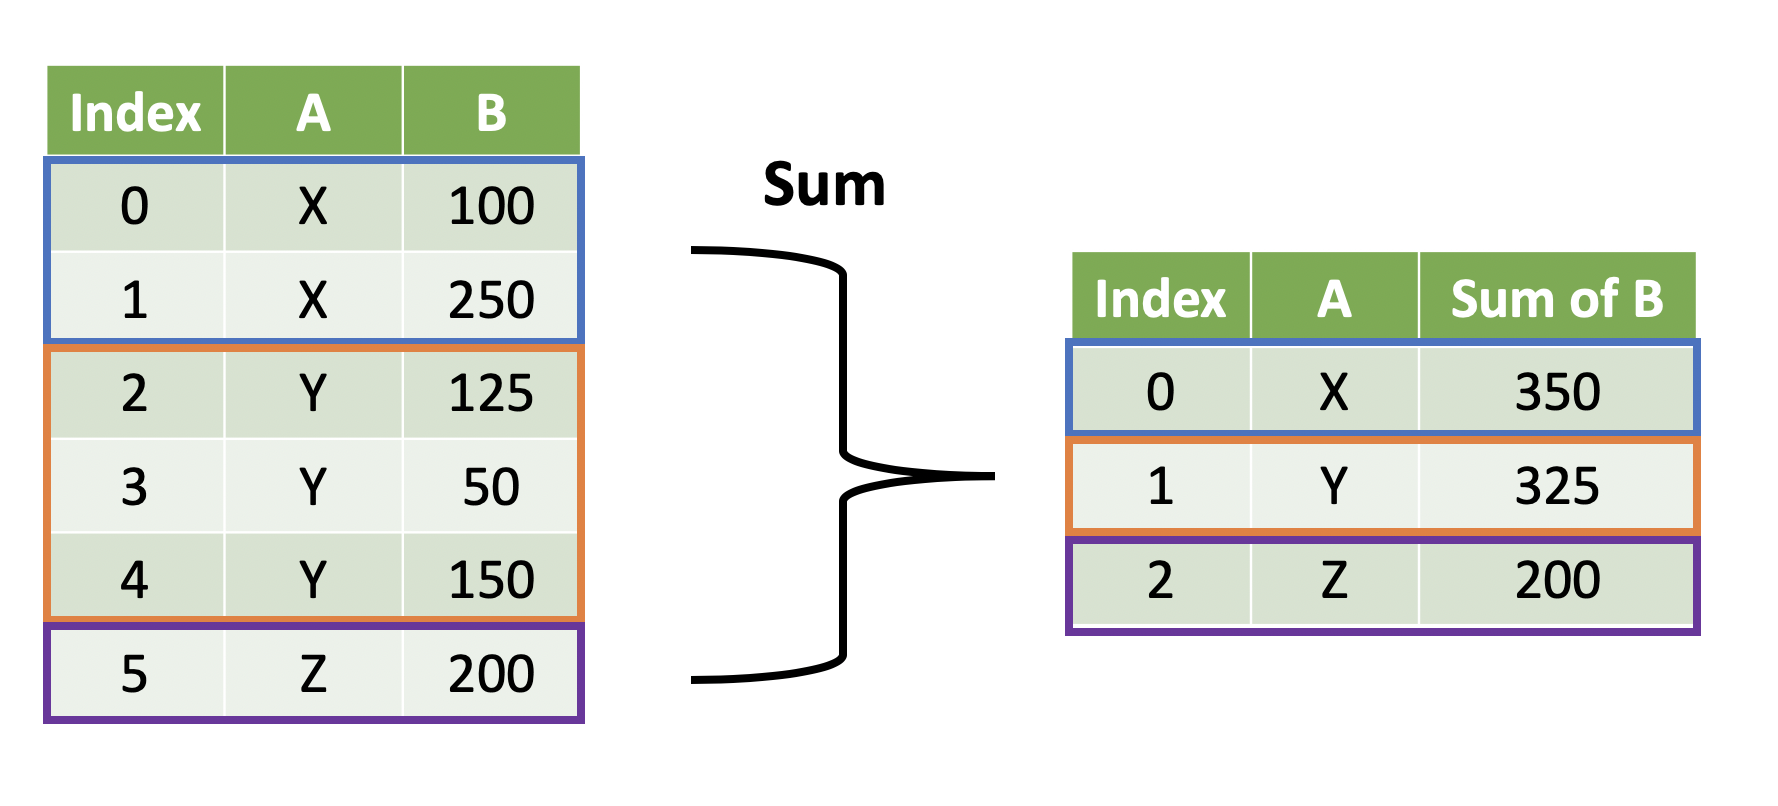

This can be useful when we want to aggregate by category:
  * Maximum temperature *by month*
  * Total home runs *by team*
  * Total sales *by neighborhood*
  * Average number of seats *by plane manufacturer*

When we summarize by groups, we can use the same aggregation methods we previously did
  * Summary methods for a specific summary operation: `DataFrame.sum()`
  * Describe method for a collection of summary operations: `DataFrame.describe()`
  * Agg method for flexibility in summary operations: `DataFrame.agg({'VariableName': ['sum', 'mean']})`

The only difference is the need to **set the DataFrame group prior to aggregating**. We can set the DataFrame group by calling the `DataFrame.groupby()` method and passing a variable name:

In [124]:
ames_grp = ames.groupby('neighborhood')
ames_grp

If we then call an aggregation method after our `groupby()` call, we will see the DataFrame returned with group-level aggregations:

In [165]:
agg_ames = (
    ames.groupby('neighborhood')
    .agg({'saleprice': ['mean', 'median']})
    .head()
)
agg_ames

saleprice          
                       mean    median
neighborhood                         
Blmngtn       196661.678571  191500.0
Blueste       143590.000000  130500.0
BrDale        105608.333333  106000.0
BrkSide       124756.250000  126750.0
ClearCr       208662.090909  197500.0

This process always follows this model:

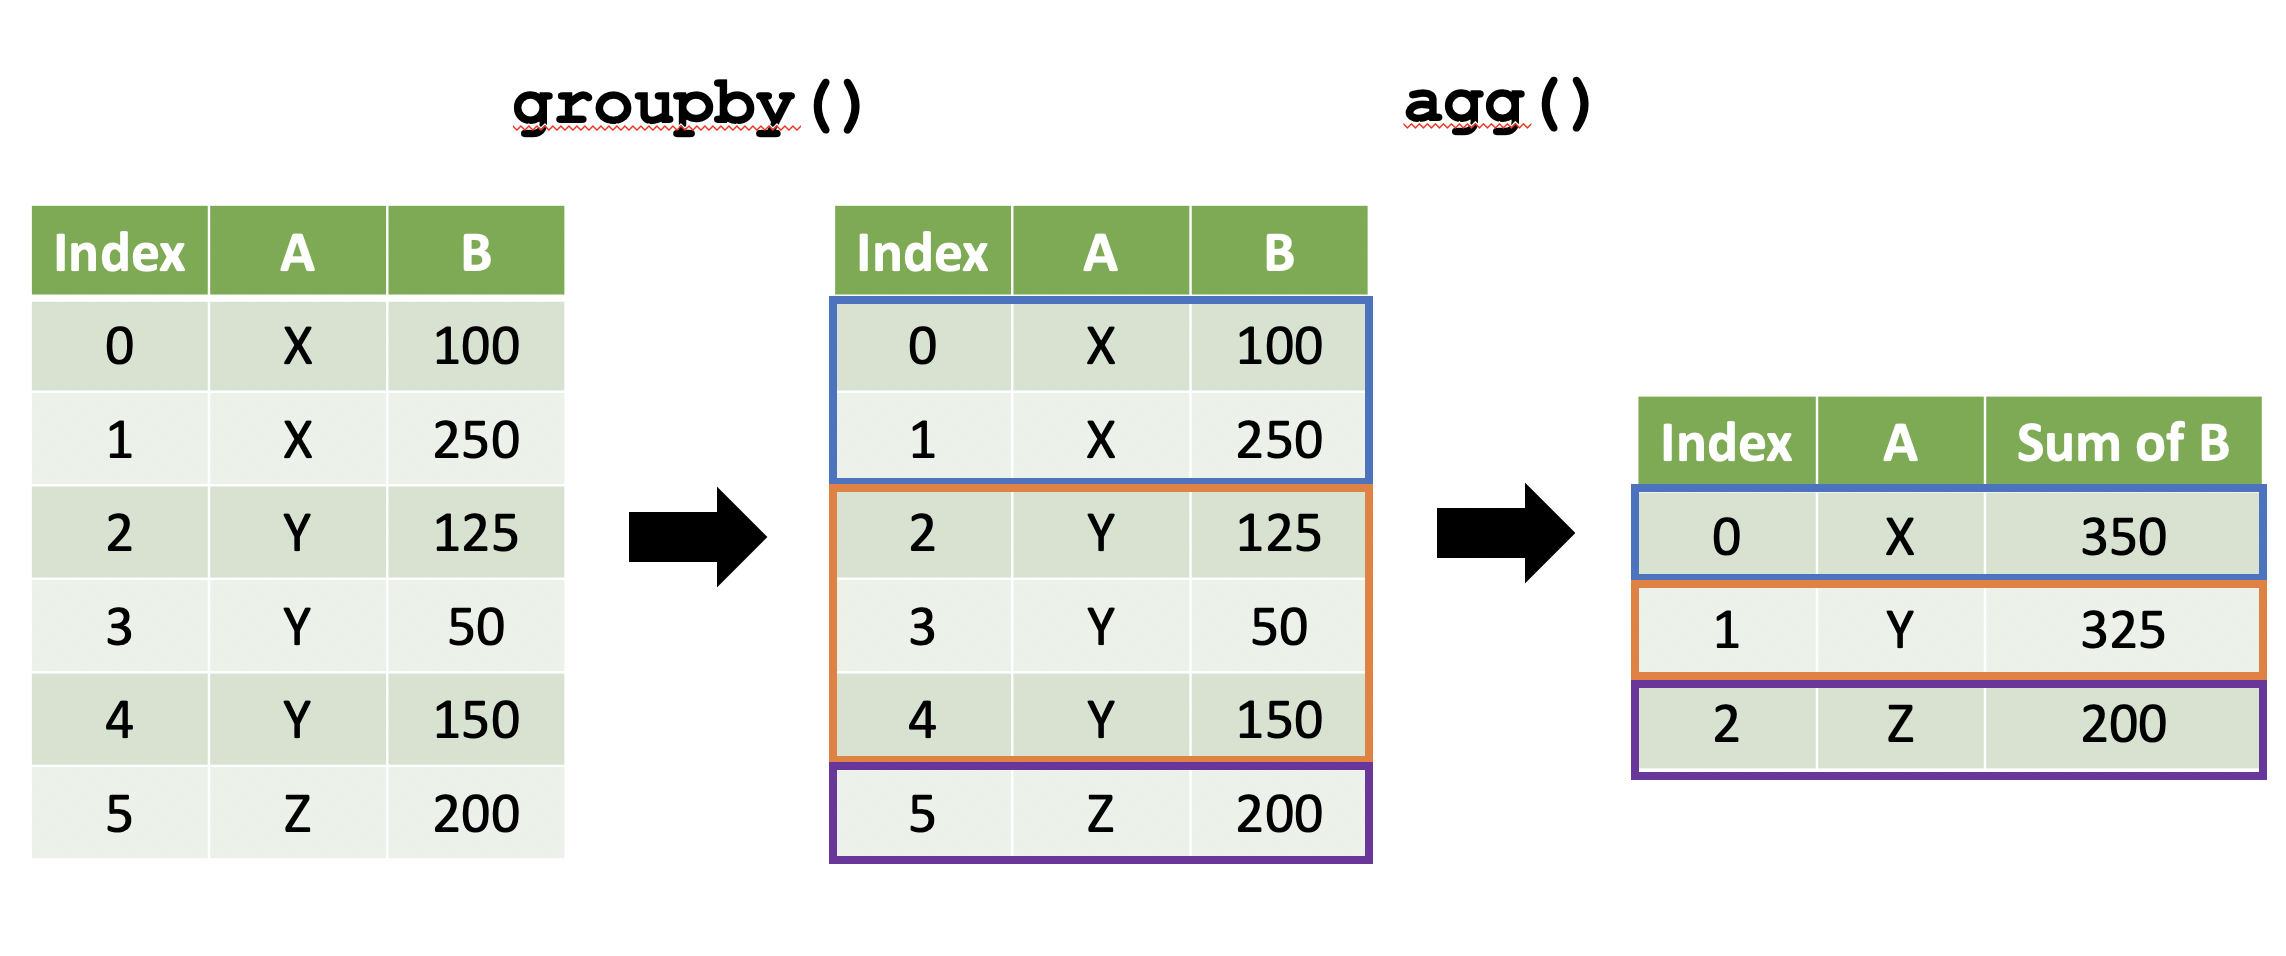

### Groups as index vs. variables

Notice that the grouped variable becomes the Index in our example.

In [130]:
agg_ames.index

Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr'], dtype='object', name='neighborhood')

You should be aware that you can no longer treat the result as if it were numbered by row:

In [134]:
agg_ames.loc[["Blmngtn", "ClearCr"]]

# But try agg_ames.iloc[[0, -1]]!

saleprice          
                       mean    median
neighborhood                         
Blmngtn       196661.678571  191500.0
ClearCr       208662.090909  197500.0

If you don't wish this behavior you can specify `as_index=False`:

In [166]:
(
    ames.groupby('neighborhood', as_index=False)
    .agg({'saleprice': ['mean', 'median']})
    .head()
)

neighborhood      saleprice          
                         mean    median
0      Blmngtn  196661.678571  191500.0
1      Blueste  143590.000000  130500.0
2       BrDale  105608.333333  106000.0
3      BrkSide  124756.250000  126750.0
4      ClearCr  208662.090909  197500.0

### Grouping by multiple variables

Sometimes we have multiple categories by which we'd like to group. To extend our example, assume we want to find the average sale price by neighborhood ***AND*** year sold. We can pass a list of variable names to the `groupby()` method:

In [167]:
agg_ames_multi = (
    ames.groupby(['neighborhood', 'yr sold'])
    .agg({'saleprice': 'mean'})
)
agg_ames_multi

saleprice
neighborhood yr sold               
Blmngtn      2006     214424.454545
             2007     194671.500000
             2008     190714.400000
             2009     177266.666667
             2010     176000.000000
...                             ...
Timber       2010     224947.625000
Veenker      2006     270000.000000
             2007     253577.777778
             2008     225928.571429
             2009     253962.500000

[130 rows x 1 columns]

**Note:** when you group by multiple columns the result will have a multidimensional index. These are a pain, frankly, and I encourage you to use `as_index=False` in such cases.

In [144]:
agg_ames_multi.index

MultiIndex([('Blmngtn', 2006),
            ('Blmngtn', 2007),
            ('Blmngtn', 2008),
            ('Blmngtn', 2009),
            ('Blmngtn', 2010),
            ('Blueste', 2007),
            ('Blueste', 2008),
            ('Blueste', 2009),
            ('Blueste', 2010),
            ( 'BrDale', 2006),
            ...
            ('StoneBr', 2010),
            ( 'Timber', 2006),
            ( 'Timber', 2007),
            ( 'Timber', 2008),
            ( 'Timber', 2009),
            ( 'Timber', 2010),
            ('Veenker', 2006),
            ('Veenker', 2007),
            ('Veenker', 2008),
            ('Veenker', 2009)],
           names=['neighborhood', 'yr sold'], length=130)

## Questions

Are there any questions before moving on?